# Challenge

### Preparation

1. Clone or download the tutorial repository on [GitHub](http://github.com/MISTlab/NotebookTutorial)
2. Make sure the data files (`baby-names2.csv`, `brains.csv`) are available
3. **(optional)** Create a GitHub repository to hand in the solutions

### Expected Outcome

* The result should be an IPython Notebook
* Send an nbviewer link (via GitHub) or the .ipynb file to [Giovanni Beltrame](mailto:giovanni.beltrame@polymtl.ca)
* You can modify this notebook to provide the solutions

### The Winner

* The first person to send a notebook with all the requested tasks correctly will be declared the winner

---

## Task 1 - Importing and manipulating data

* Load the `baby-names2.csv` from the data directory as a DataFrame and display the first 12 rows as an HTML table

In [261]:
import pandas as pd
pd.set_option('display.notebook_repr_html', True)
df = pd.read_csv("data/baby-names2.csv")
df.head(12)

,year,name,prop,sex,soundex
0,1880,John,0.081541,boy,J500
1,1880,William,0.080511,boy,W450
2,1880,James,0.050057,boy,J520
3,1880,Charles,0.045167,boy,C642
4,1880,George,0.043292,boy,G620
5,1880,Frank,0.027380,boy,F652
6,1880,Joseph,0.022229,boy,J210
7,1880,Thomas,0.021401,boy,T520
8,1880,Henry,0.020641,boy,H560
9,1880,Robert,0.020404,boy,R163


* Count how many boy names and how many girl names there are in the dataset

In [262]:
df.groupby('sex')['name'].nunique()


sex
boy     3437
girl    4018
dtype: int64

* Answer: what was the most popular name (boy or girl) in 1945?

In [263]:
df_filtered = df[df['year'] == 1945]
df_filtered[(df['prop'] == max(df_filtered['prop']))]


,year,name,prop,sex,soundex
65000,1945,James,0.054288,boy,J520


## Task 2 - Plotting data

* Plot a graph that shows the transition in time of **Alice** from a boy to a girl name

In [264]:
alices = df[(df['name'] == 'Alice')]
alices = alices.set_index(alices['year'])
boys = alices[alices['sex'] == 'boy']
girls = alices[alices['sex'] == 'girl']
yr_range = range(min(alices['year']), max(alices['year'])+1)

In [265]:
boys = boys.reindex(yr_range, fill_value='0', columns=['prop']);


# Looks like Alice never was a popular boys name... 

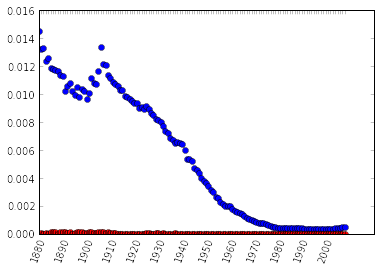

In [266]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(girls['prop'], 'bo');
plt.plot(boys['prop'], 'ro');

ticks = []
for i in boys.index:
    if i % 10 == 0:
        ticks.append(i)
    else:
        ticks.append('')

plt.xticks(range(len(boys)), ticks, rotation=70);


* Make an interactive widget that shows the most popular name for a given year (use a slider for the year)

In [267]:
def get_popular_name(y):
    df_filtered = df[df['year'] == y]
    popular = df_filtered[(df['prop'] == max(df_filtered['prop']))]
    print popular
    return popular

from IPython.html.widgets import interactive
from IPython.display import display

w = interactive(get_popular_name, y=(min(yr_range), max(yr_range),1))
display(w)

       year   name      prop  sex soundex
64000  1944  James  0.055406  boy    J520


## Task 3 - Tell a story (if you made it this far)

- Load the `brains.csv` file as a DataFrame using `Mode` as the index label
- Fill the missing data with zeros
- For each row, replace all columns except `Mode` and `Covariates.x` with one column having as value the sum of all removed columns
- Find the Covariate that best correlates with the sum comlumn
- Plot the covariate as a histogram using 3 bins


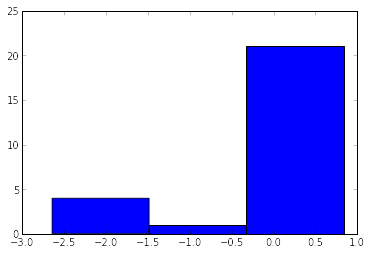

In [268]:
import numpy as np

# Write your code here
df = pd.read_csv("data/brains.csv", index_col="Mode")

df = df.fillna(0)

keys = []
for k in df.keys():
    if k != "Mode" and k[0:10] != "Covariates":
        keys.append(k)

    
df['summed'] = df[keys].sum(axis=1)
df = df.drop(keys, axis=1)

corr = {}
for k in df.keys():
    if k != "summed":
        corr[k] = df['summed'].corr(df[k])


max(corr)

plt.hist(df[max(corr)], 3);